In [1]:
import pandas_gbq
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.cluster import SpectralClustering
warnings.filterwarnings("ignore")

In [2]:
with open('app/SQL/Query_traer_clientes_simplificado.sql') as file:
    query=file.read()
data=pandas_gbq.read_gbq(query, project_id='customer-experience-384423',progress_bar_type=None)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250209 entries, 0 to 250208
Data columns (total 74 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id_cliente                         250209 non-null  Int64  
 1   promedio_compra                    250209 non-null  float64
 2   cantidad_compras                   250209 non-null  Int64  
 3   dropsize                           250209 non-null  float64
 4   contactable                        250209 non-null  Int64  
 5   compro_en_OUTLET                   250209 non-null  Int64  
 6   compro_en_ESTELAR                  250209 non-null  Int64  
 7   compro_en_MOVIES                   250209 non-null  Int64  
 8   compro_en_LITTLE_MIC               250209 non-null  Int64  
 9   compro_en_MOVIES_W                 250209 non-null  Int64  
 10  compro_en_OUTLET_MIC               250209 non-null  Int64  
 11  compro_en_EVENTOS                  2502

In [4]:
data.describe()

,id_cliente,promedio_compra,cantidad_compras,dropsize,contactable,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,...,compro_en_INTERNACIONAL,compro_en_ZONA_1,compro_en_ZONA_2,compro_en_ZONA_3,compro_en_ZONA_4,compro_en_ZONA_5,compro_en_ZONA_6,compro_en_ZONA_7,compro_en_ZONA_M,compro_en_ECUADOR
count,250209.0,2.502090e+05,250209.0,2.502090e+05,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,...,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0,250209.0
mean,125105.999996,7.746694e+16,4.189805,3.043208e+16,0.579476,0.0,0.0,0.0,0.846197,0.0,...,0.0,0.11193,0.125891,0.275454,0.181452,0.086716,0.153843,0.103885,0.0,0.0
std,72229.261096,5.908390e+17,14.888362,3.181584e+17,0.493644,0.0,0.0,0.0,0.360761,0.0,...,0.0,0.315281,0.331727,0.446744,0.385393,0.281418,0.360799,0.305112,0.0,0.0
min,1.0,-4.644237e+05,1.0,-3.505040e+05,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,62554.0,4.293500e+04,1.0,1.824268e+04,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,125106.0,6.561740e+04,2.0,2.814700e+04,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,187658.0,1.058650e+05,5.0,4.074800e+04,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
max,250210.0,9.998460e+18,6803.0,9.908710e+18,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


In [5]:
data.drop(columns=['contactable'],inplace=True)

In [6]:
len(data)

250209

In [7]:
len(data[data['promedio_compra']<0])

467

In [8]:
len(data[data['promedio_compra']<0])*100/len(data)

0.18664396564472102

In [9]:
len(data[data['promedio_compra']>10586500])

8929

In [10]:
len(data[data['promedio_compra']>10586500])*100/len(data)

3.568616636491893

<Axes: >

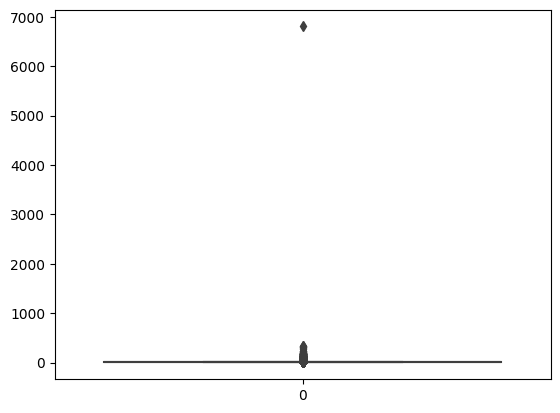

In [11]:
sns.boxplot(data['cantidad_compras'])

In [12]:
data_sin_outliers=data[(data['promedio_compra']<10586500) & (data['promedio_compra']>0)&(data['cantidad_compras']<6000)]

In [13]:
id_cliente=data_sin_outliers['id_cliente']
data_sin_outliers.drop(columns=['id_cliente'],inplace=True)

In [14]:
data_sin_outliers.fillna(0,inplace=True)

In [15]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_sin_outliers)
data_scaled = pd.DataFrame(data_scaled, columns=data_sin_outliers.columns)

In [16]:
data_sin_outliers.describe()

,promedio_compra,cantidad_compras,dropsize,compro_en_OUTLET,compro_en_ESTELAR,compro_en_MOVIES,compro_en_LITTLE_MIC,compro_en_MOVIES_W,compro_en_OUTLET_MIC,compro_en_EVENTOS,...,compro_en_INTERNACIONAL,compro_en_ZONA_1,compro_en_ZONA_2,compro_en_ZONA_3,compro_en_ZONA_4,compro_en_ZONA_5,compro_en_ZONA_6,compro_en_ZONA_7,compro_en_ZONA_M,compro_en_ECUADOR
count,2.403450e+05,240345.0,2.403450e+05,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,...,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0,240345.0
mean,8.114929e+04,3.95846,2.969112e+04,0.0,0.0,0.0,0.869504,0.0,0.0,0.0,...,0.0,0.115534,0.129697,0.247611,0.186769,0.08923,0.157981,0.106709,0.0,0.0
std,6.394785e+04,5.567154,1.630905e+04,0.0,0.0,0.0,0.336849,0.0,0.0,0.0,...,0.0,0.319666,0.33597,0.431625,0.389727,0.285076,0.364724,0.308744,0.0,0.0
min,1.818989e-12,1.0,8.565878e-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4.229500e+04,1.0,1.797626e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,6.331900e+04,2.0,2.742033e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.005622e+05,4.0,3.876656e+04,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2.212655e+06,343.0,3.465600e+05,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0


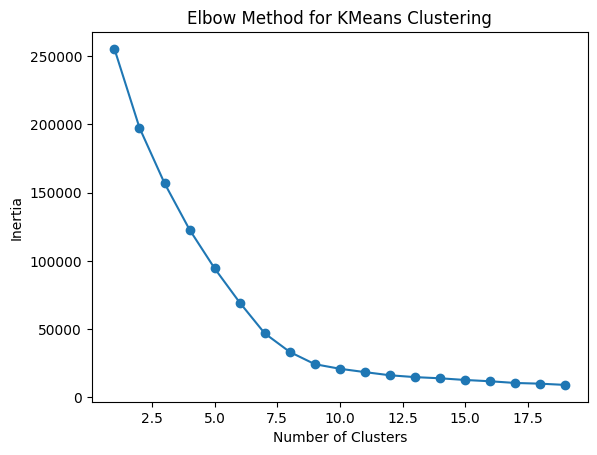

In [17]:
cluster_range = range(1, 20)  
inertias = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)


plt.plot(cluster_range, inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for KMeans Clustering')
plt.show()

For n_clusters = 2 The average silhouette_score for kmeans is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score for kmeans is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score for kmeans is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score for kmeans is : 0.5745566973301872
For n_clusters = 6 The average silhouette_score for kmeans is : 0.45066160127444405
For n_clusters = 7 The average silhouette_score for kmeans is : 0.3819406959018584
For n_clusters = 8 The average silhouette_score for kmeans is : 0.32199720497407136
For n_clusters = 9 The average silhouette_score for kmeans is : 0.3315863717623336
For n_clusters = 10 The average silhouette_score for kmeans is : 0.32803945754067615
For n_clusters = 11 The average silhouette_score for kmeans is : 0.33758336234798764
For n_clusters = 12 The average silhouette_score for kmeans is : 0.35316894915281904
For n_clusters = 13 The average silhouette_score for kmeans is : 0.357296680978

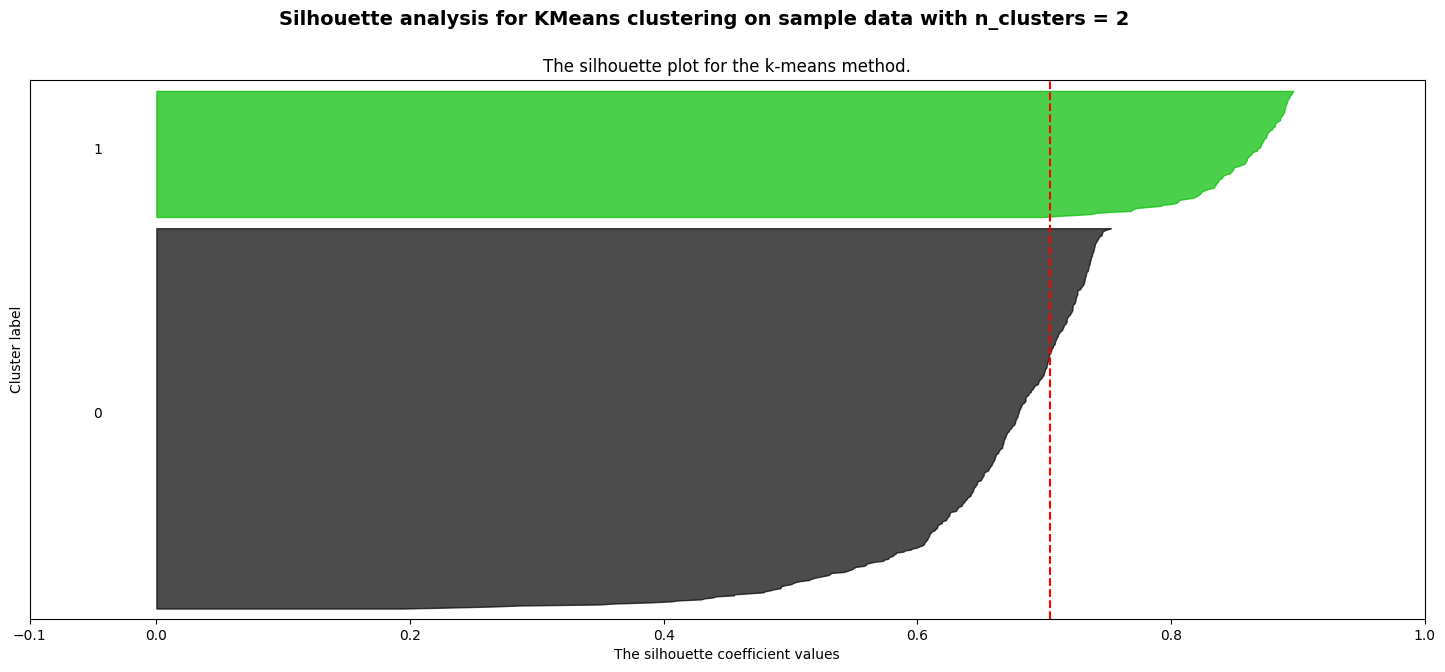

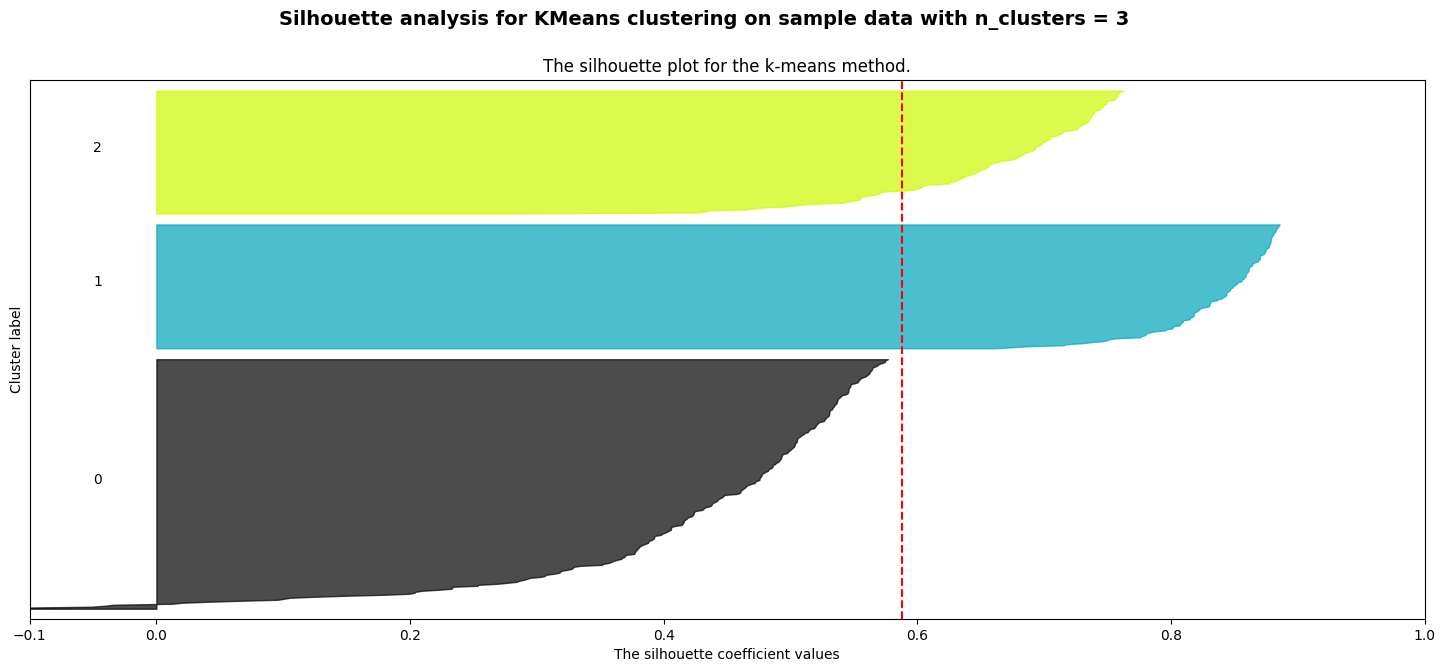

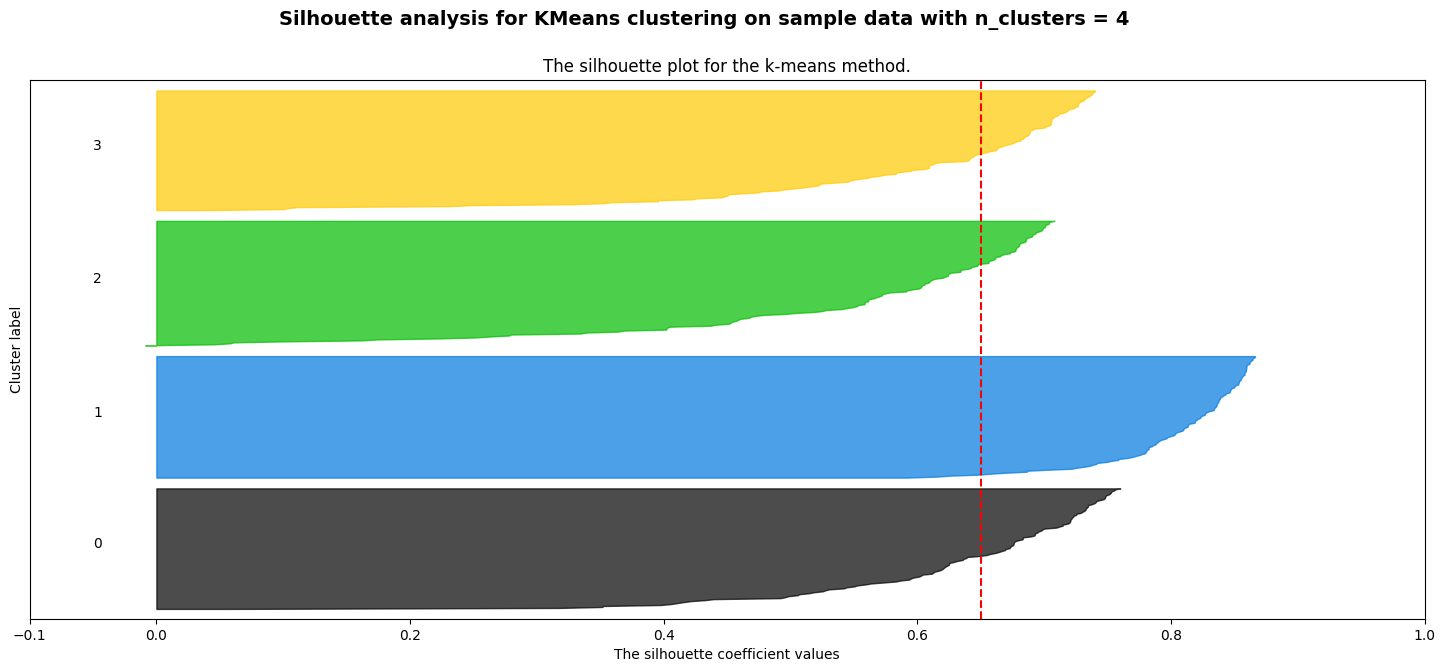

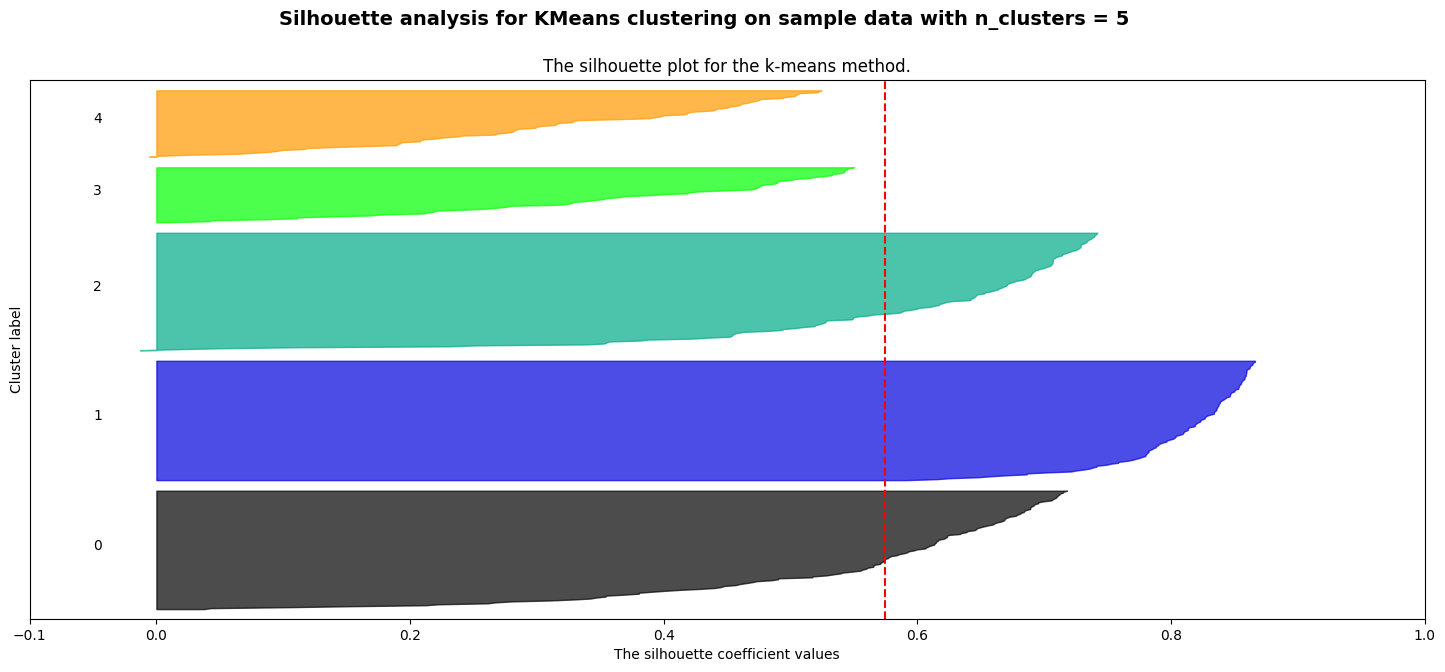

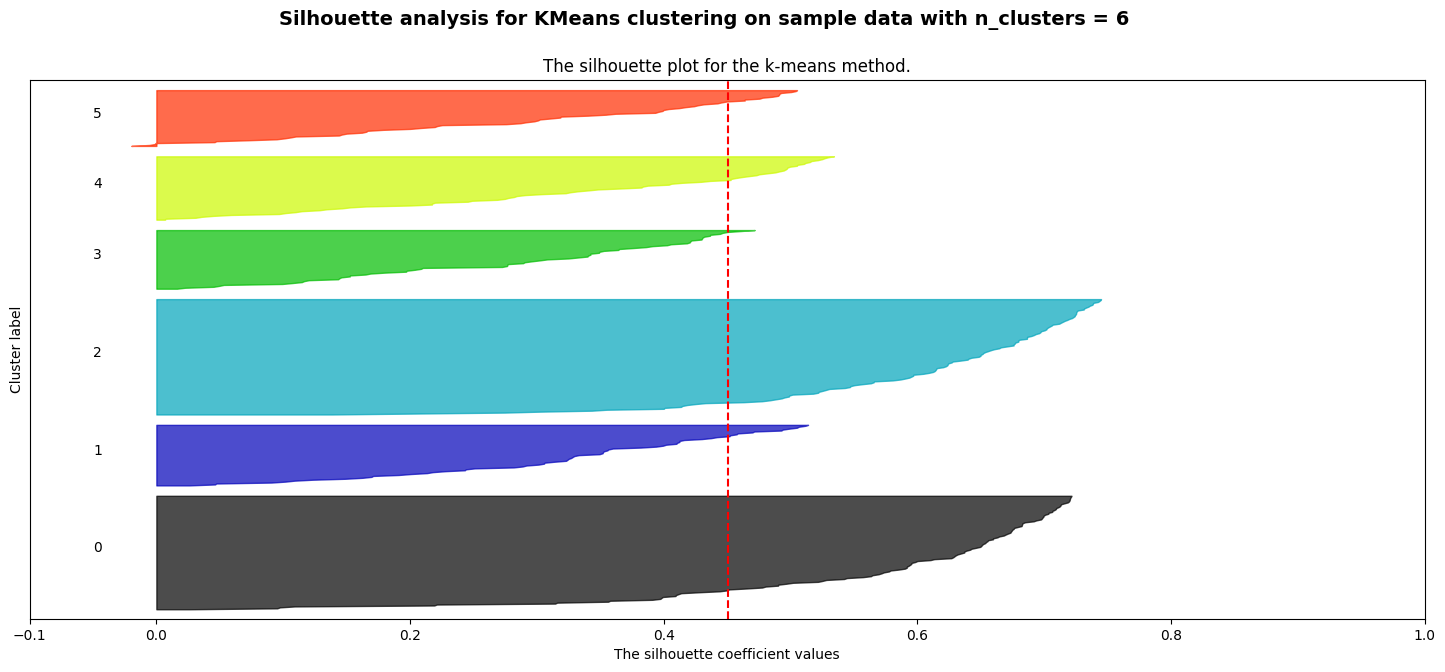

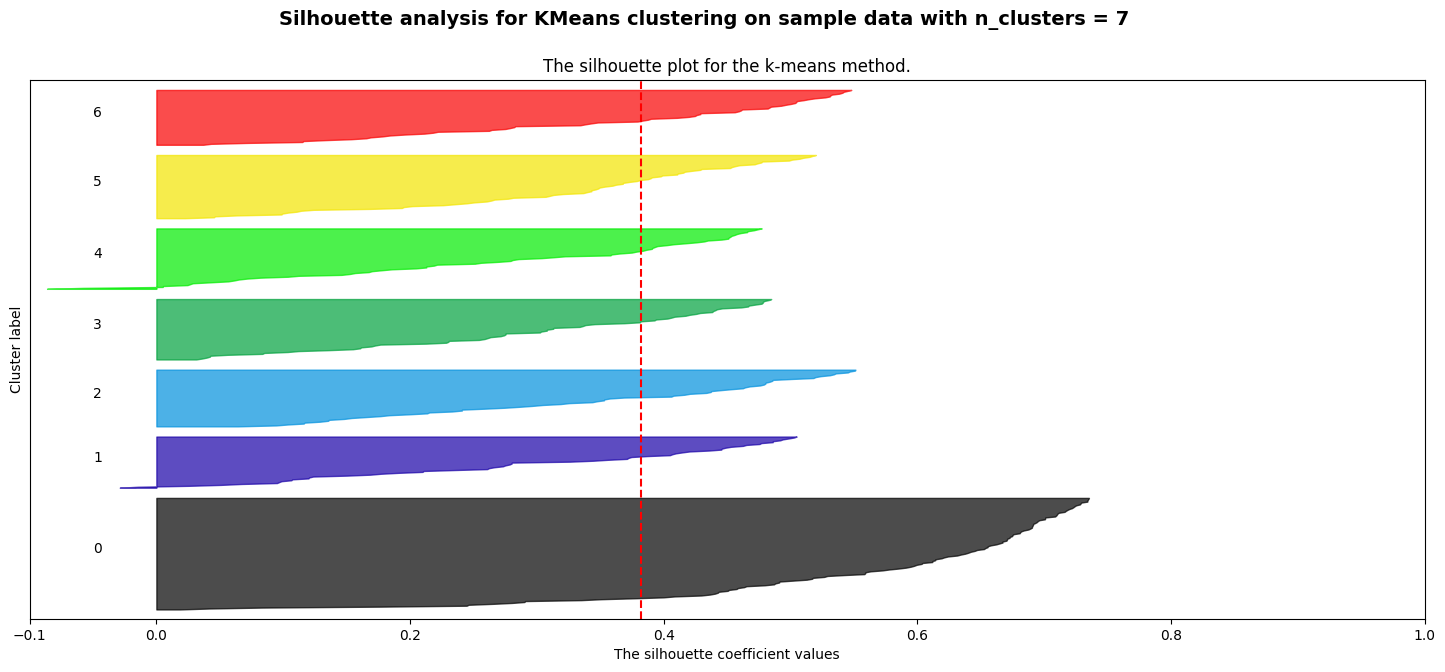

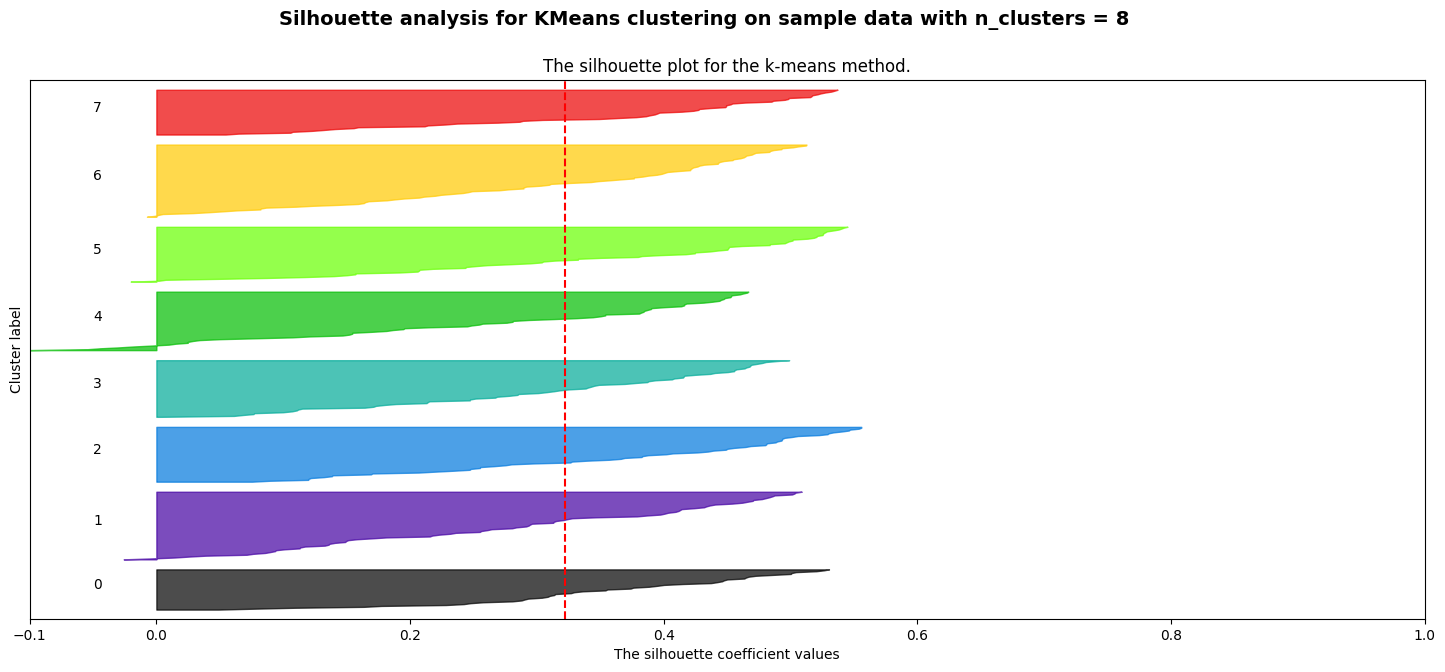

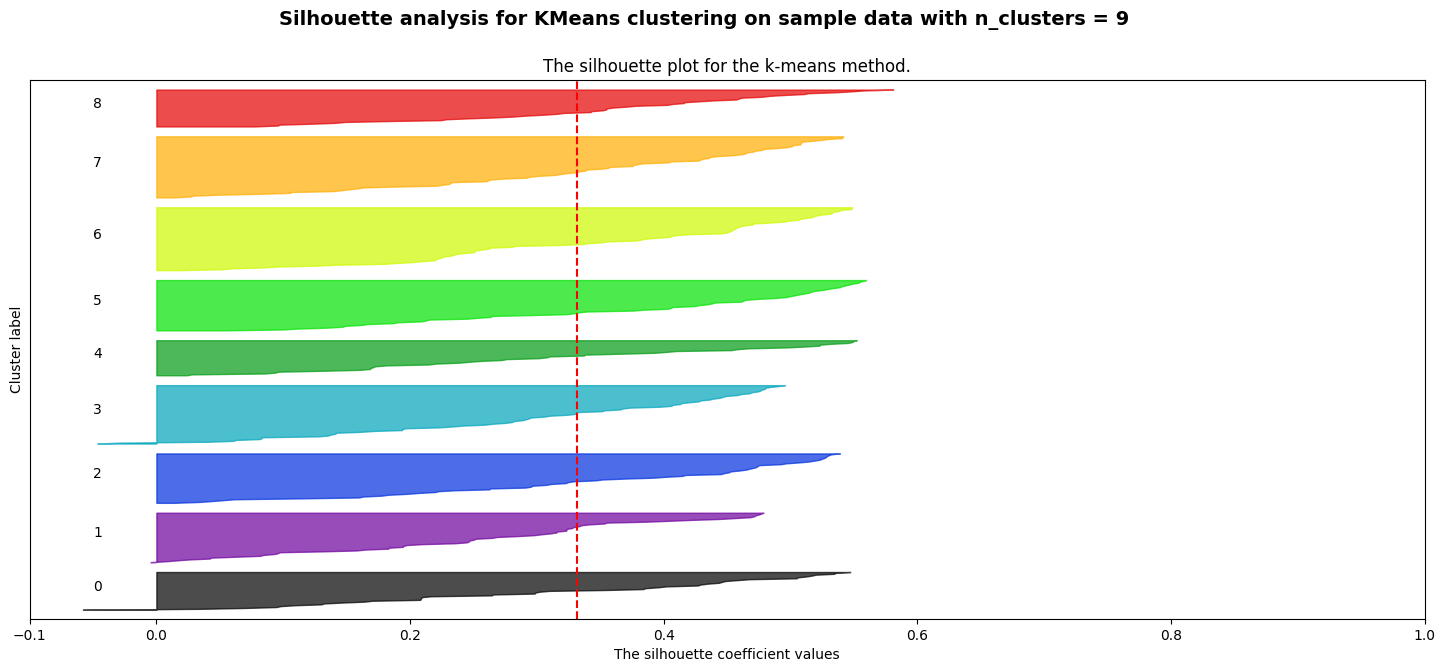

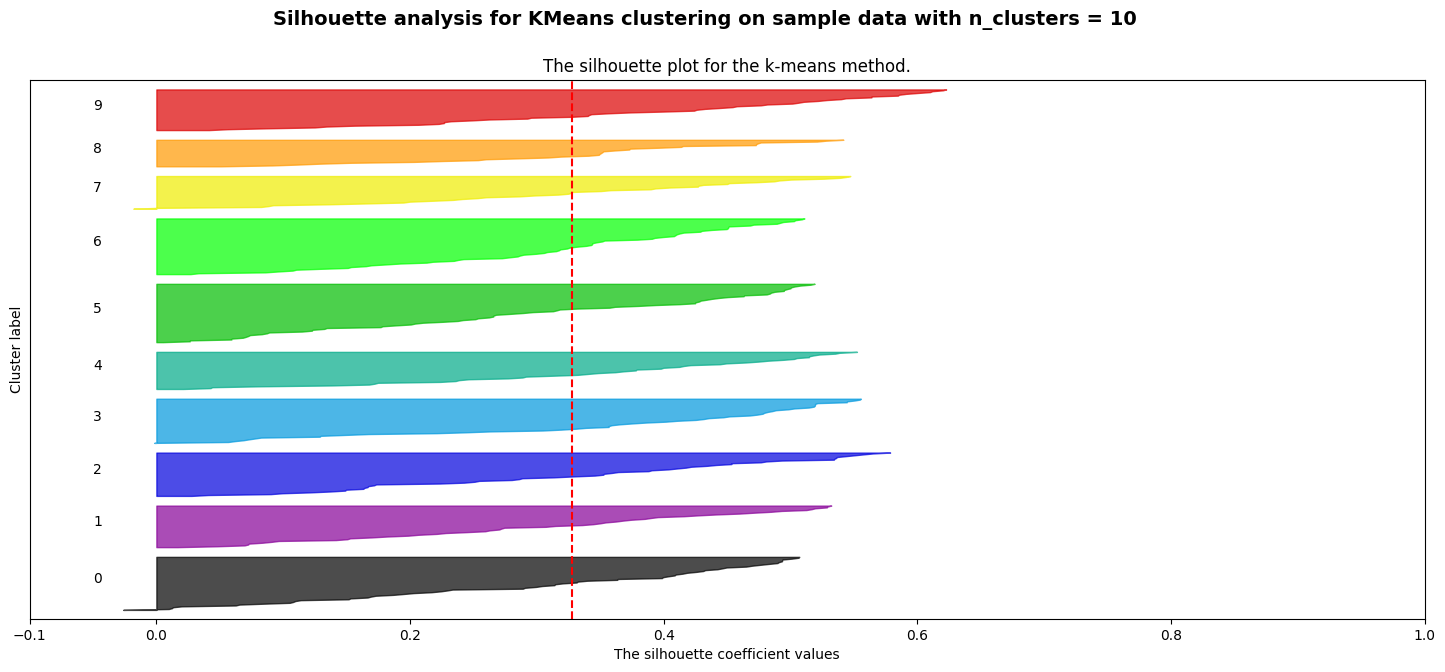

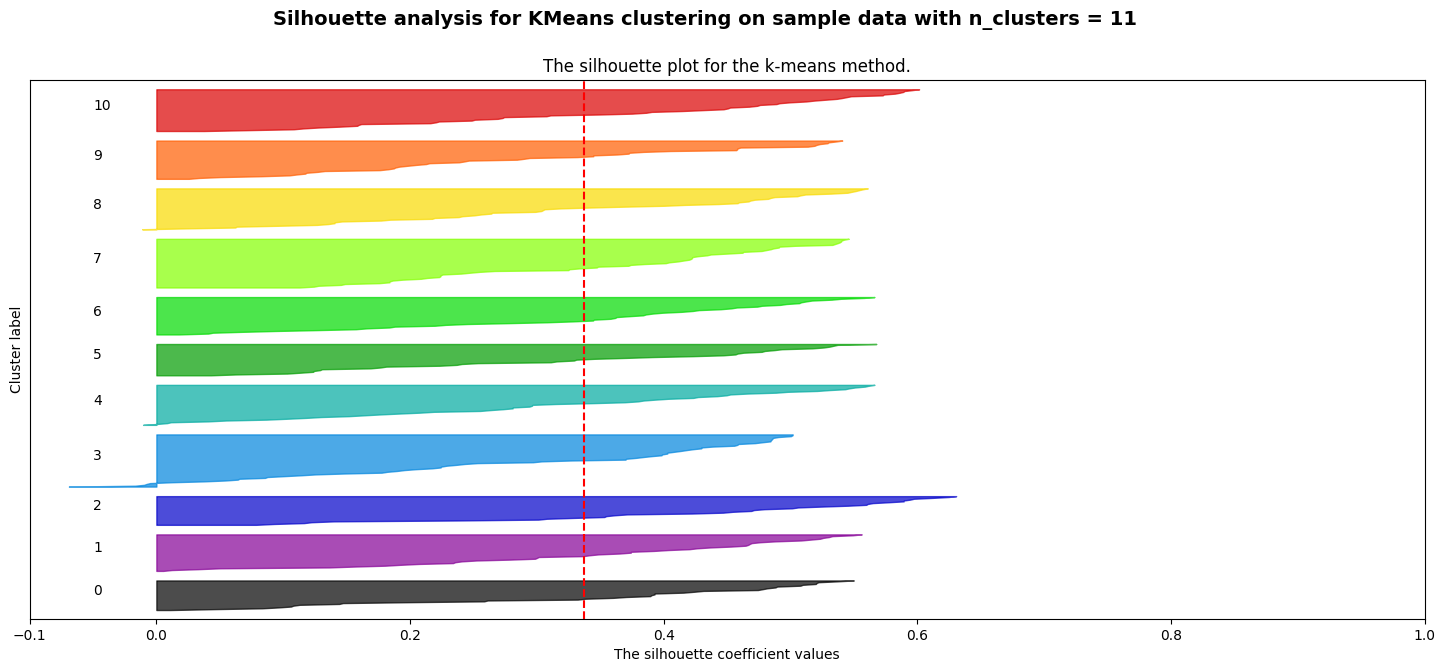

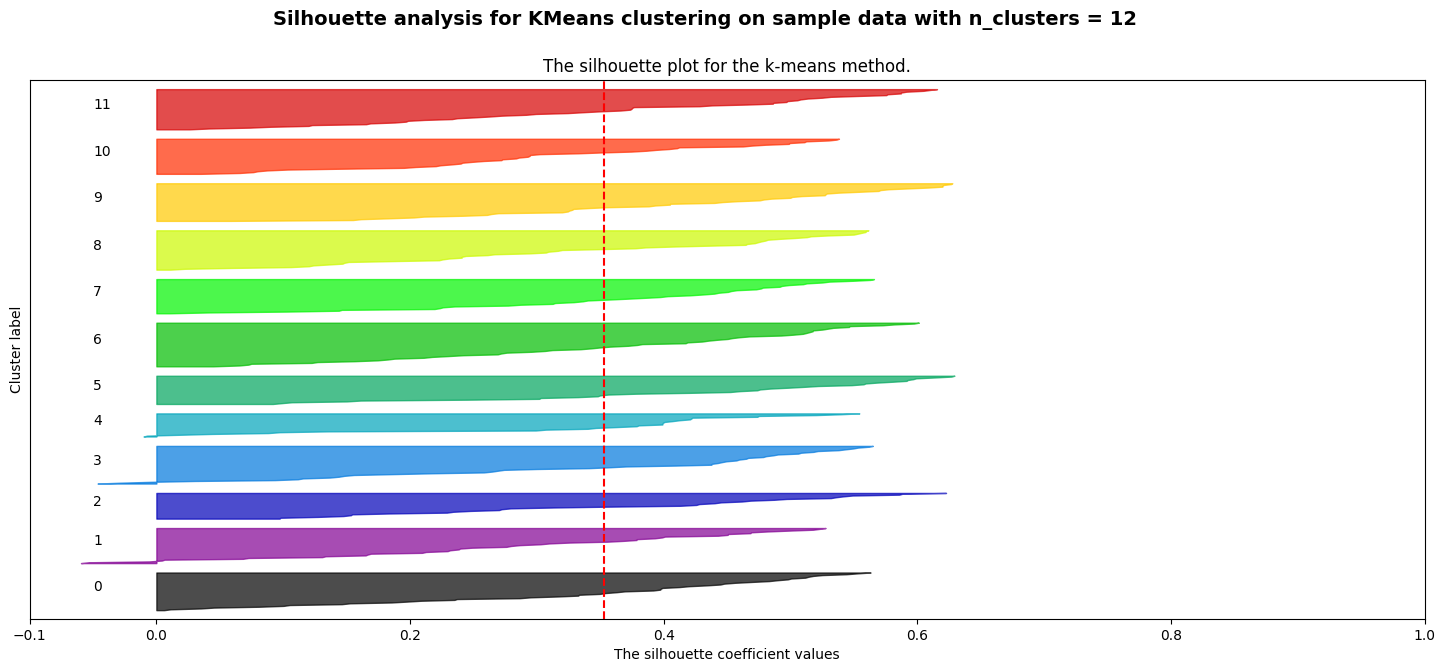

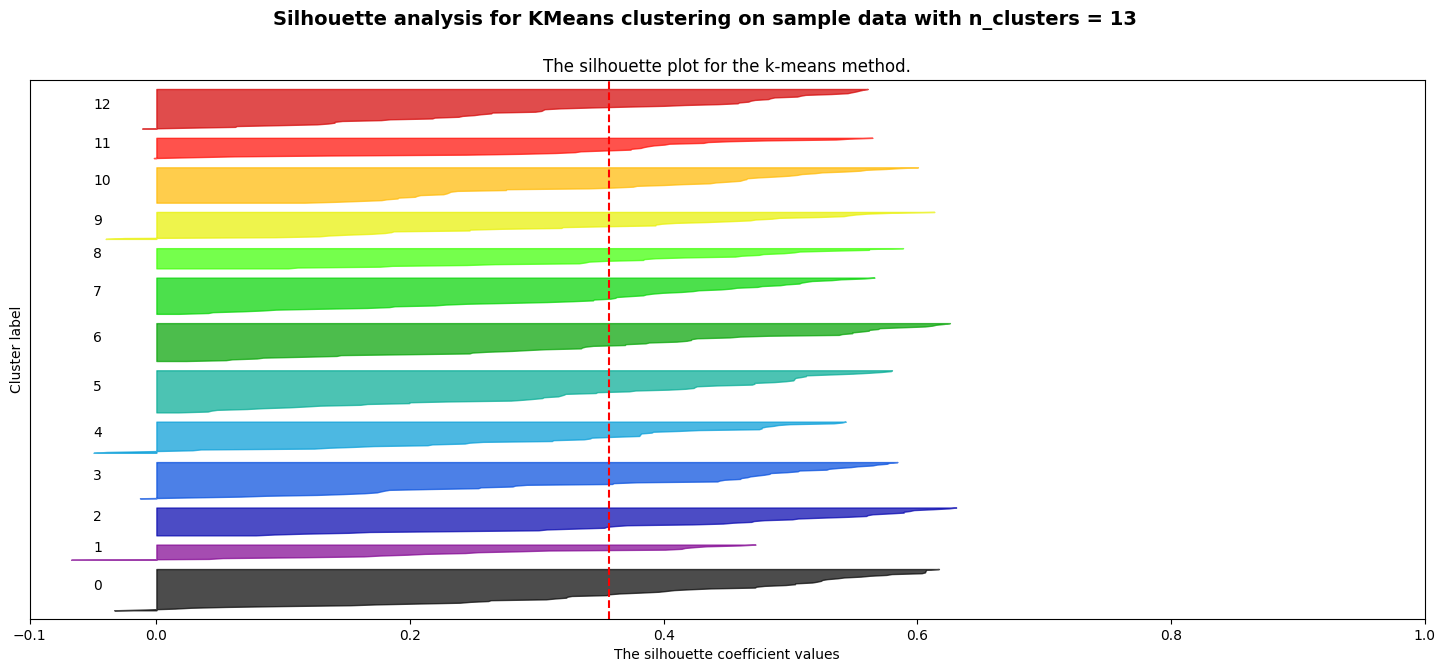

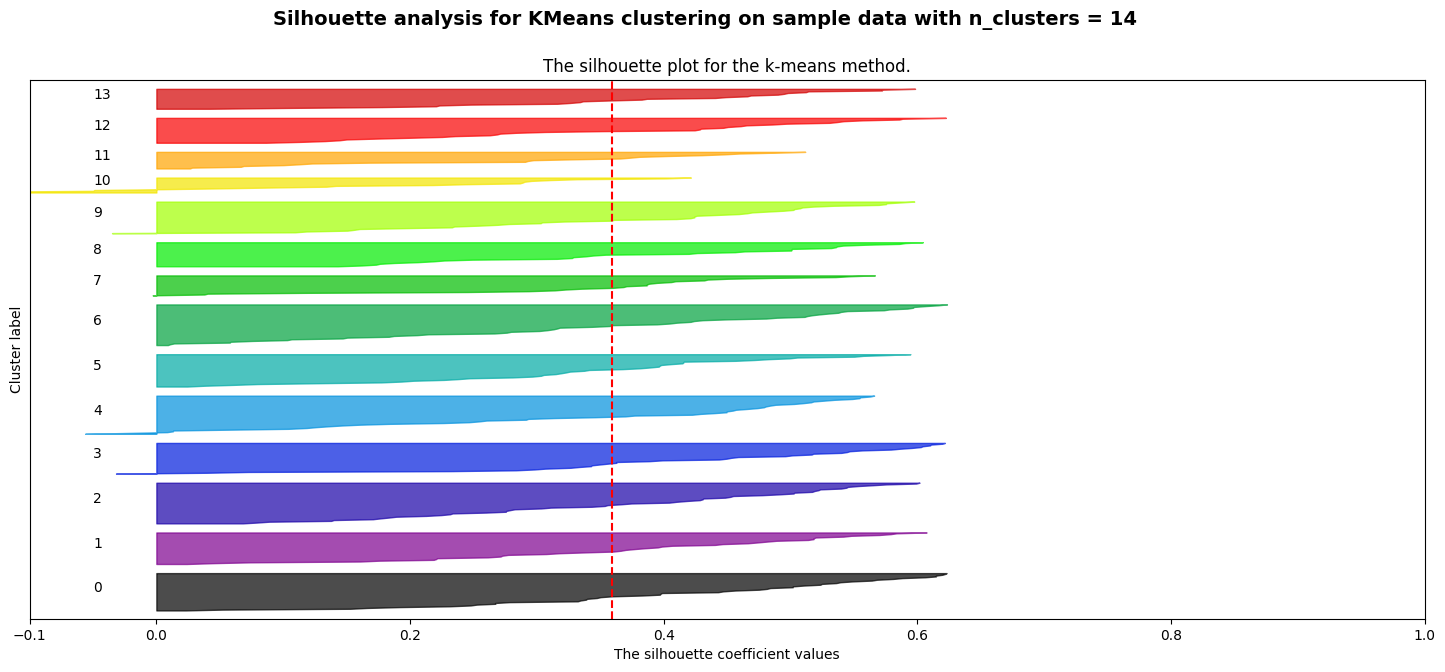

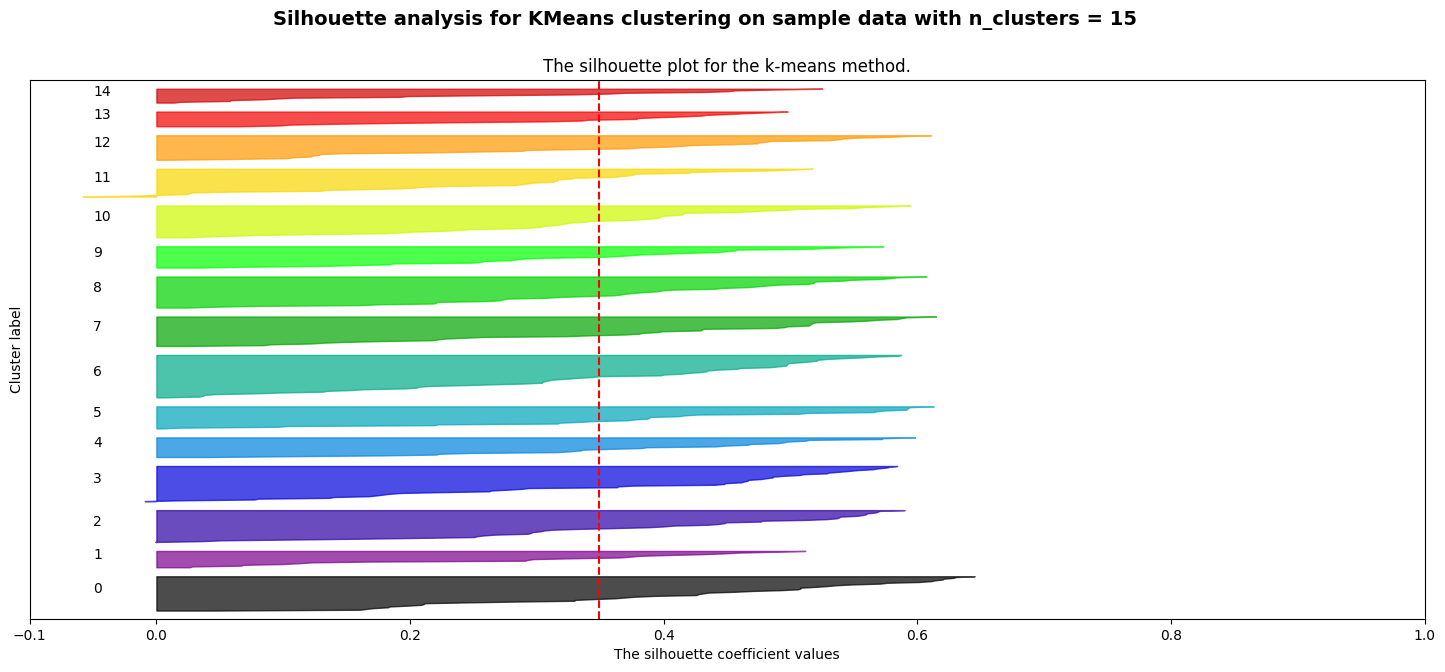

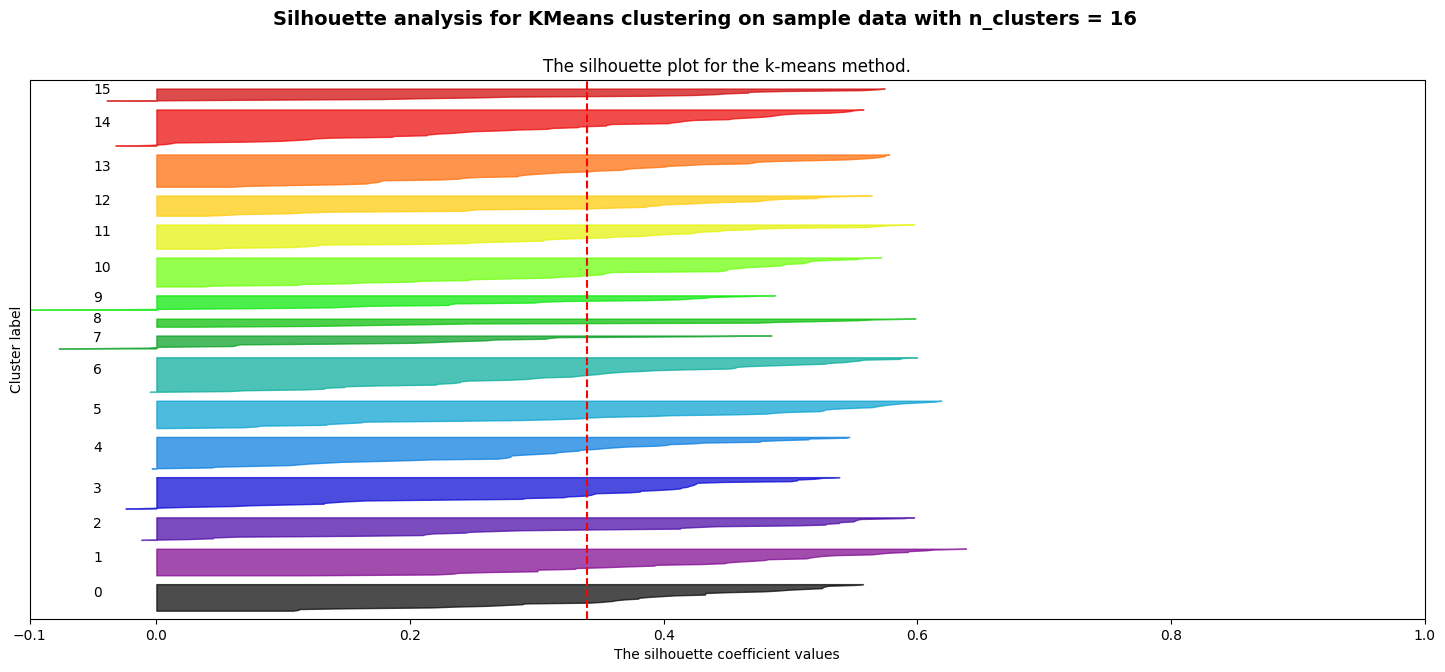

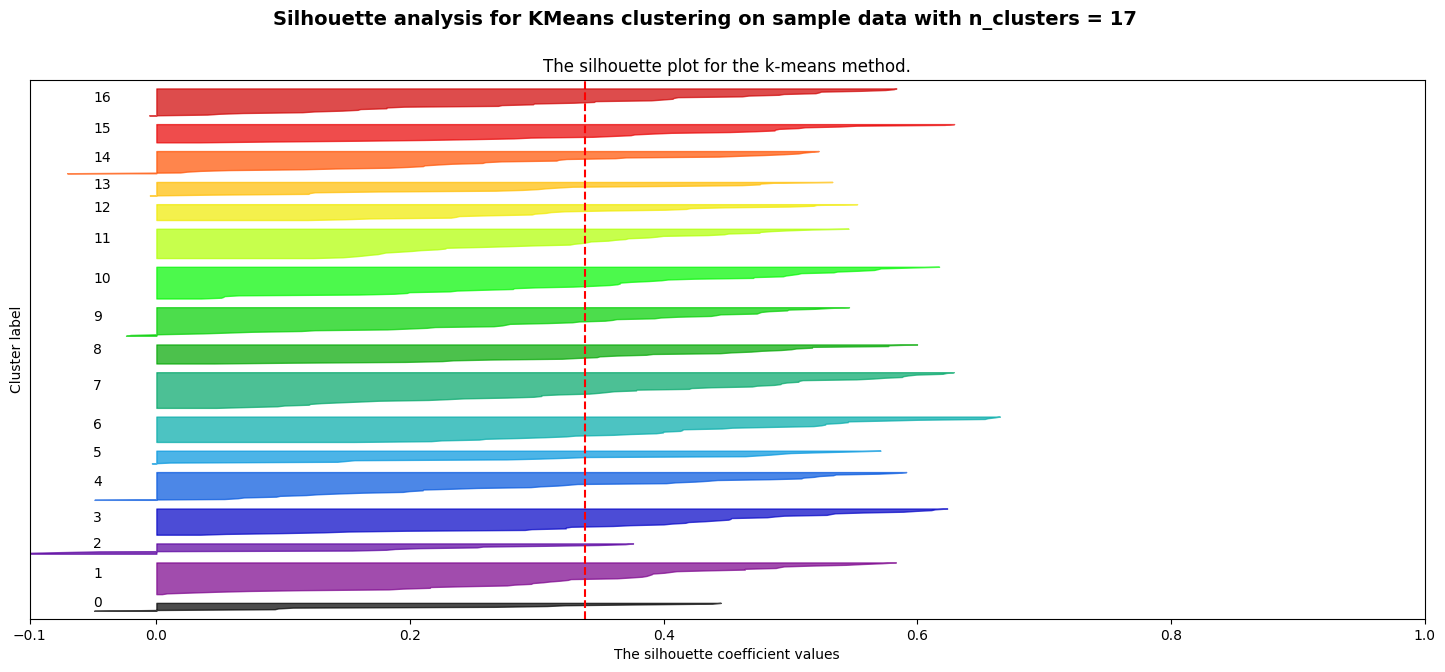

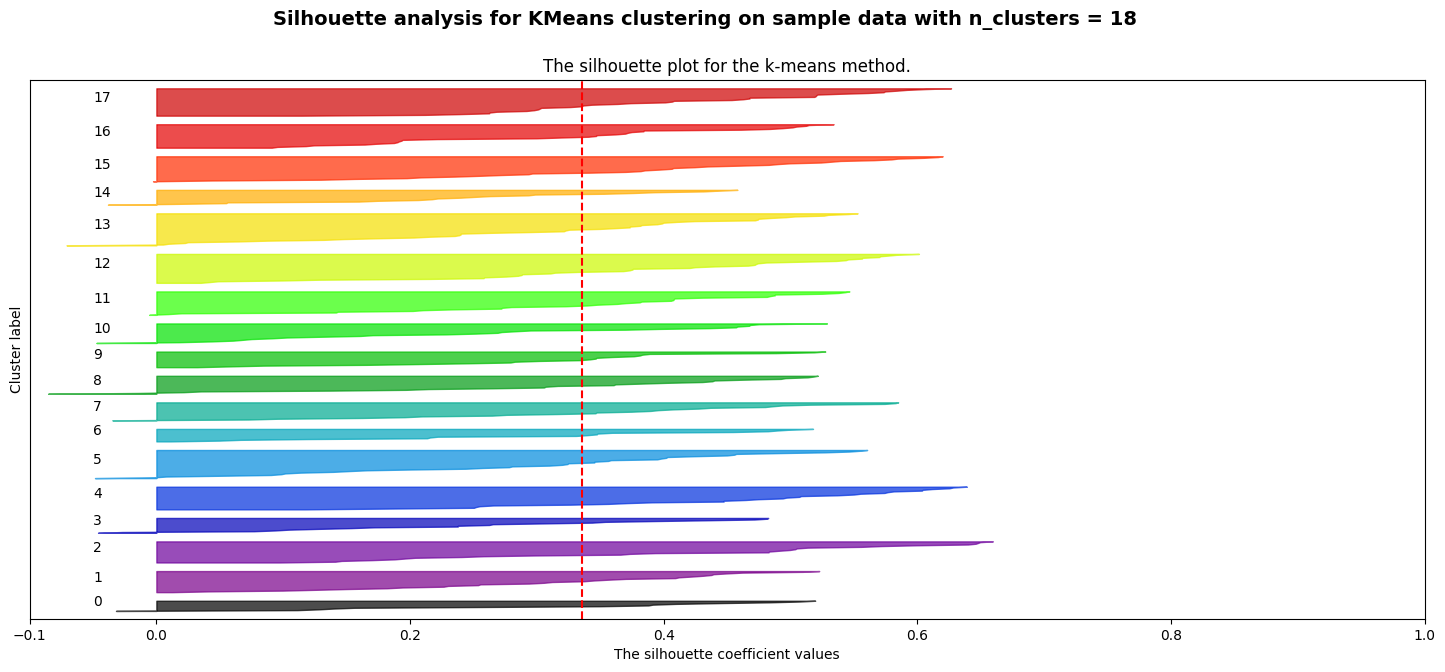

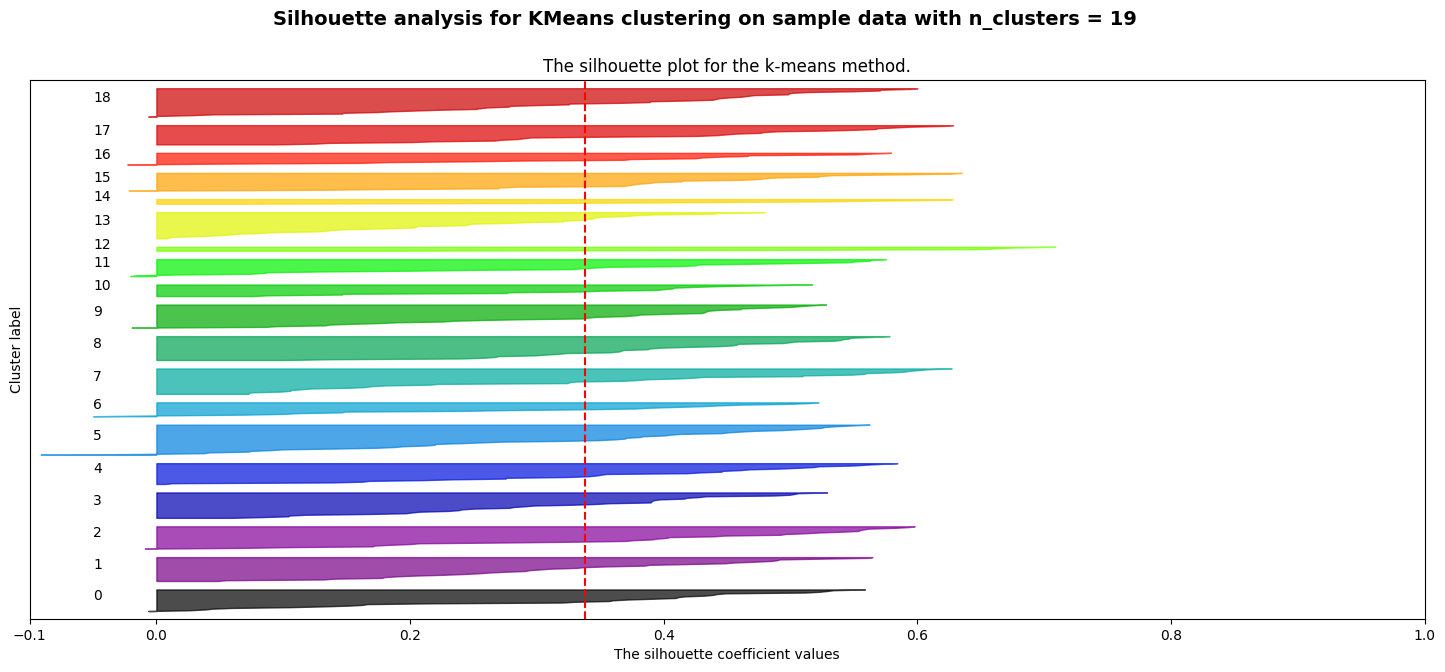

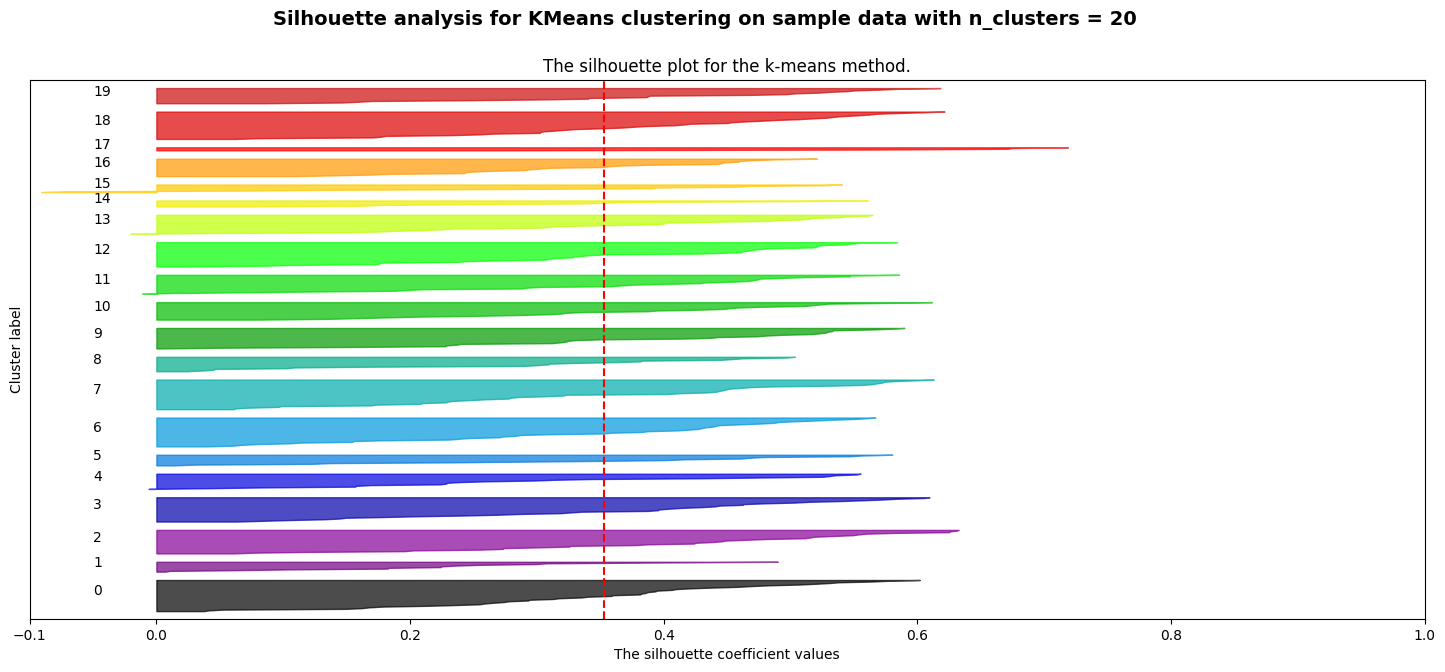

In [38]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [x+2 for x in range(19)]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(figsize=(10, 10))
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer_kmeans = KMeans(n_clusters=n_clusters)
    kmeans_cluster_labels = clusterer_kmeans.fit_predict(X)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg_kmeans = silhouette_score(X, kmeans_cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score for kmeans is :",
        silhouette_avg_kmeans,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values_kmeans = silhouette_samples(X, kmeans_cluster_labels)

    y_lower_kmeans = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        kmeans_ith_cluster_silhouette_values = sample_silhouette_values_kmeans[kmeans_cluster_labels == i]
        kmeans_ith_cluster_silhouette_values.sort()
        size_cluster_i_kmeans = kmeans_ith_cluster_silhouette_values.shape[0]
        y_upper_kmeans = y_lower_kmeans + size_cluster_i_kmeans
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower_kmeans, y_upper_kmeans),
            0,
            kmeans_ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower_kmeans + 0.5 * size_cluster_i_kmeans, str(i))
        y_lower_kmeans = y_upper_kmeans + 10  
       

    ax1.set_title("The silhouette plot for the k-means method.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg_kmeans, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

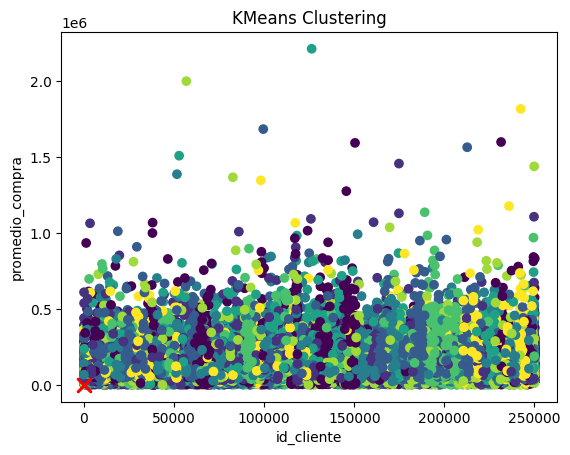

In [24]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(id_cliente, data_sin_outliers['promedio_compra'], c=labels) 
plt.xlabel('id_cliente')
plt.ylabel('promedio_compra')
plt.title('KMeans Clustering')
plt.show()

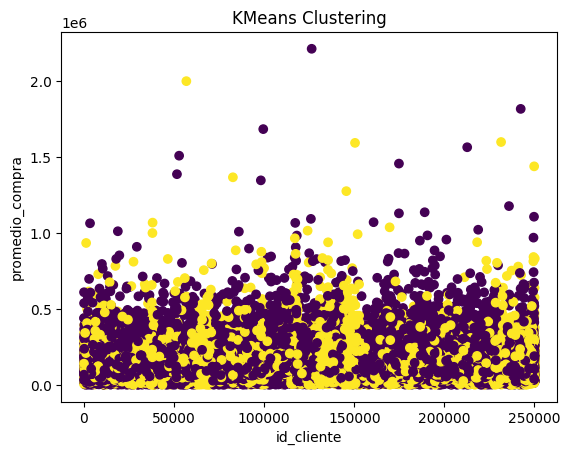

In [39]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
plt.scatter(id_cliente, data_sin_outliers['promedio_compra'], c=labels) 
plt.xlabel('id_cliente')
plt.ylabel('promedio_compra')
plt.title('KMeans Clustering')
plt.show()